<a href="https://colab.research.google.com/github/faribaki/Sale-system_EDA_statistics/blob/main/DS19_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
data = pd.read_csv('campaigns.csv')
data.head()

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81


In [ ]:
data[data['AgeofOutlets'] <= 5]['SalesInThousands'].mean()

55.83363636363637

In [ ]:
data[data['AgeofOutlets'] > 5]['SalesInThousands'].mean()

51.87829268292683

In [ ]:
stats.mannwhitneyu(data[data['AgeofOutlets'] <= 5]['SalesInThousands'], data[data['AgeofOutlets'] > 5]['SalesInThousands'])

MannwhitneyuResult(statistic=39850.0, pvalue=0.038021034624992026)

In [ ]:
data[(data['Week'] == 1) | (data['Week'] == 2)]['SalesInThousands'].mean()

53.58857664233577

In [ ]:
data[(data['Week'] == 3) | (data['Week'] == 4)]['SalesInThousands'].mean()

53.34383211678833

In [ ]:
stats.mannwhitneyu(data[(data['Week'] == 1) | (data['Week'] == 2)]['SalesInThousands'], data[(data['Week'] == 3) | (data['Week'] == 4)]['SalesInThousands'])

MannwhitneyuResult(statistic=37985.0, pvalue=0.809615928247331)

In [ ]:
data['MarketSize'].value_counts()

,count
MarketSize,
Medium,320
Large,168
Small,60


In [ ]:
data.groupby('MarketSize')['SalesInThousands'].mean()

,SalesInThousands
MarketSize,
Large,70.116726
Medium,43.985344
Small,57.409333


In [ ]:
stats.mannwhitneyu(data[data['MarketSize'] == 'Large']['SalesInThousands'], data[data['MarketSize'] != 'Large']['SalesInThousands'])

MannwhitneyuResult(statistic=55424.0, pvalue=4.900235169004446e-43)

In [ ]:
data['Campaigns'].value_counts()

,count
Campaigns,
3,188
2,188
1,172


In [ ]:
data['Week'].value_counts()

,count
Week,
1,137
2,137
3,137
4,137


In [ ]:
data.groupby('Campaigns')['SalesInThousands'].mean()

,SalesInThousands
Campaigns,
1,58.099012
2,47.329415
3,55.364468


<Axes: >

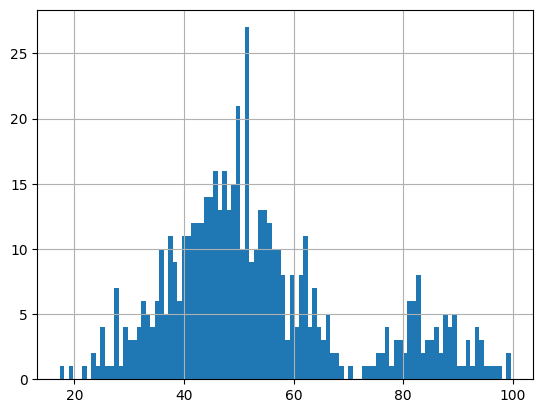

In [ ]:
data['SalesInThousands'].hist(bins=100)

In [ ]:
stats.shapiro(data['SalesInThousands'])

ShapiroResult(statistic=0.9346446327458069, pvalue=9.382556881940122e-15)

In [ ]:
stats.ttest_ind(data[data['Campaigns'] == 1]['SalesInThousands'], data[data['Campaigns'] == 2]['SalesInThousands'])

TtestResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10, df=358.0)

In [ ]:
data[data['Campaigns'] == 1]['SalesInThousands'].mean() - data[data['Campaigns'] != 1]['SalesInThousands'].mean()

6.752070138545278

In [ ]:
stats.mannwhitneyu(data[data['Campaigns'] == 1]['SalesInThousands'], data[data['Campaigns'] != 1]['SalesInThousands'])

MannwhitneyuResult(statistic=41204.5, pvalue=2.529314006420825e-07)

<Axes: >

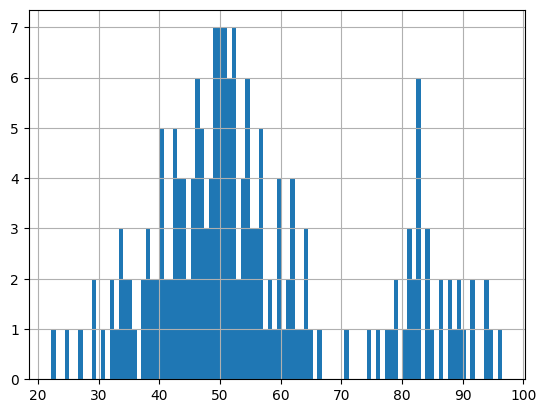

In [ ]:
data[data['Campaigns'] == 3]['SalesInThousands'].hist(bins=100)

In [ ]:
data.groupby(['Campaigns', 'OutletID'])['SalesInThousands'].mean()

Campaigns  OutletID
1          3           40.6800
           7           43.2425
           9           39.5150
           12          37.7850
           13          42.3725
                        ...   
3          808         60.2025
           809         48.1575
           903         51.8600
           905         57.3250
           917         52.9675
Name: SalesInThousands, Length: 137, dtype: float64